# SC1015 Cardiovascular Problem Statement

---

### Predicting the risks of different age groups based on their demographic characteristics such as gender, height, weight and smoking status.
### Analyzing the effect of lifestyle and environmental factors on the risk of cardiovascular disease.

### Detecting patterns between levels of physical activity, blood pressure and cholesterol levels with likelihood of developing cardiovascular disease among individuals


In [27]:
import numpy as np 
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split

#Import ML lib
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('heart_data.csv')
data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


ok so i have no idea why the age is so high (pls help for this)
and also im assuming we have to see whether or not an individual has high blood pressure and then see the factors that may affect it such as smoking and drinking alcohol 
and im cleaning the dataset in the sense where we only look at individuals of height between 160 and 175 cuz apparently avg singaporean height is 168 ish i think

## Cleaning Of Data
#### Cleaning Steps
    1. Height Between 165cm and 175cm
        Average Singaporean Height is around 168cm
    2. Weight Between 60Kg and 90Kg
    3. Convert Age from Days to Years

In [11]:
#Cleaning Data
cleaned = data.query('height > 165 and height < 175 and weight > 60 and weight < 90 and gender == 1')
#Converting Age from Days to Years
for i, row in cleaned.iterrows():
    cleaned.at[i,'age'] = cleaned.at[i,'age'] / 365
cleaned.head()
cleaned.describe()
cleaned.info()

C:\Users\jesst\AppData\Local\Temp\ipykernel_56864\3227523182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.at[i,'age'] = cleaned.at[i,'age'] / 365


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 10 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        8079 non-null   int64  
 1   id           8079 non-null   int64  
 2   age          8079 non-null   float64
 3   gender       8079 non-null   int64  
 4   height       8079 non-null   int64  
 5   weight       8079 non-null   float64
 6   ap_hi        8079 non-null   int64  
 7   ap_lo        8079 non-null   int64  
 8   cholesterol  8079 non-null   int64  
 9   gluc         8079 non-null   int64  
 10  smoke        8079 non-null   int64  
 11  alco         8079 non-null   int64  
 12  active       8079 non-null   int64  
 13  cardio       8079 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 1.2 MB


# Visualisation of Data Before and After cleaning
## Before

<AxesSubplot:xlabel='age'>

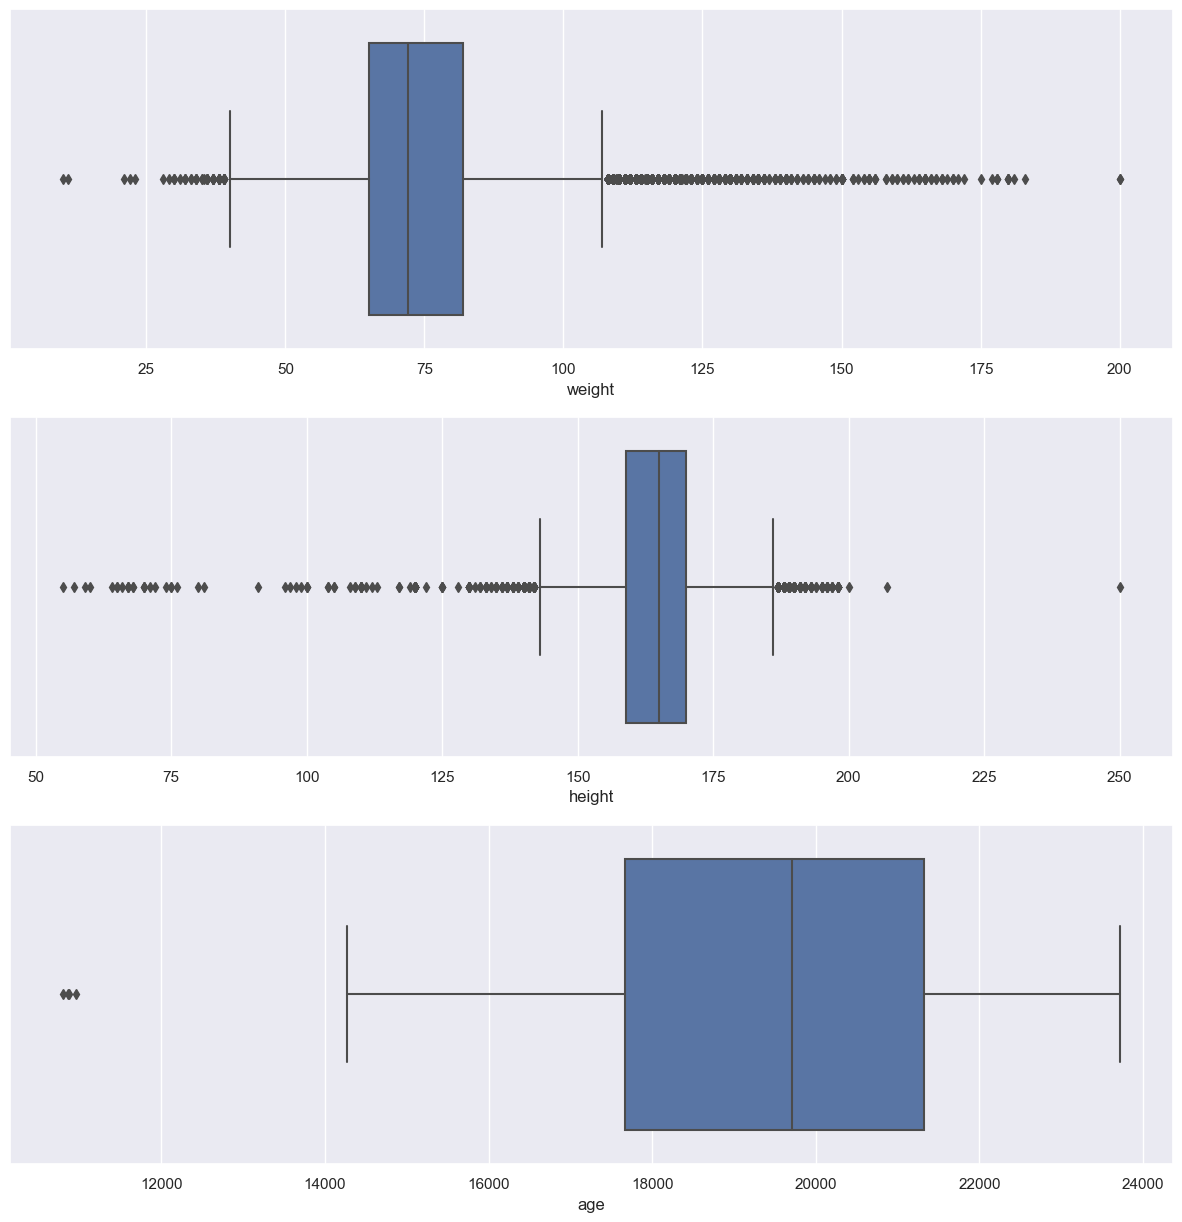

In [9]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(data = data, x = 'weight', ax = axes[0])
sb.boxplot(data = data, x = 'height', ax = axes[1])
sb.boxplot(data = data, x = 'age', ax = axes[2])

## After

<AxesSubplot:xlabel='age'>

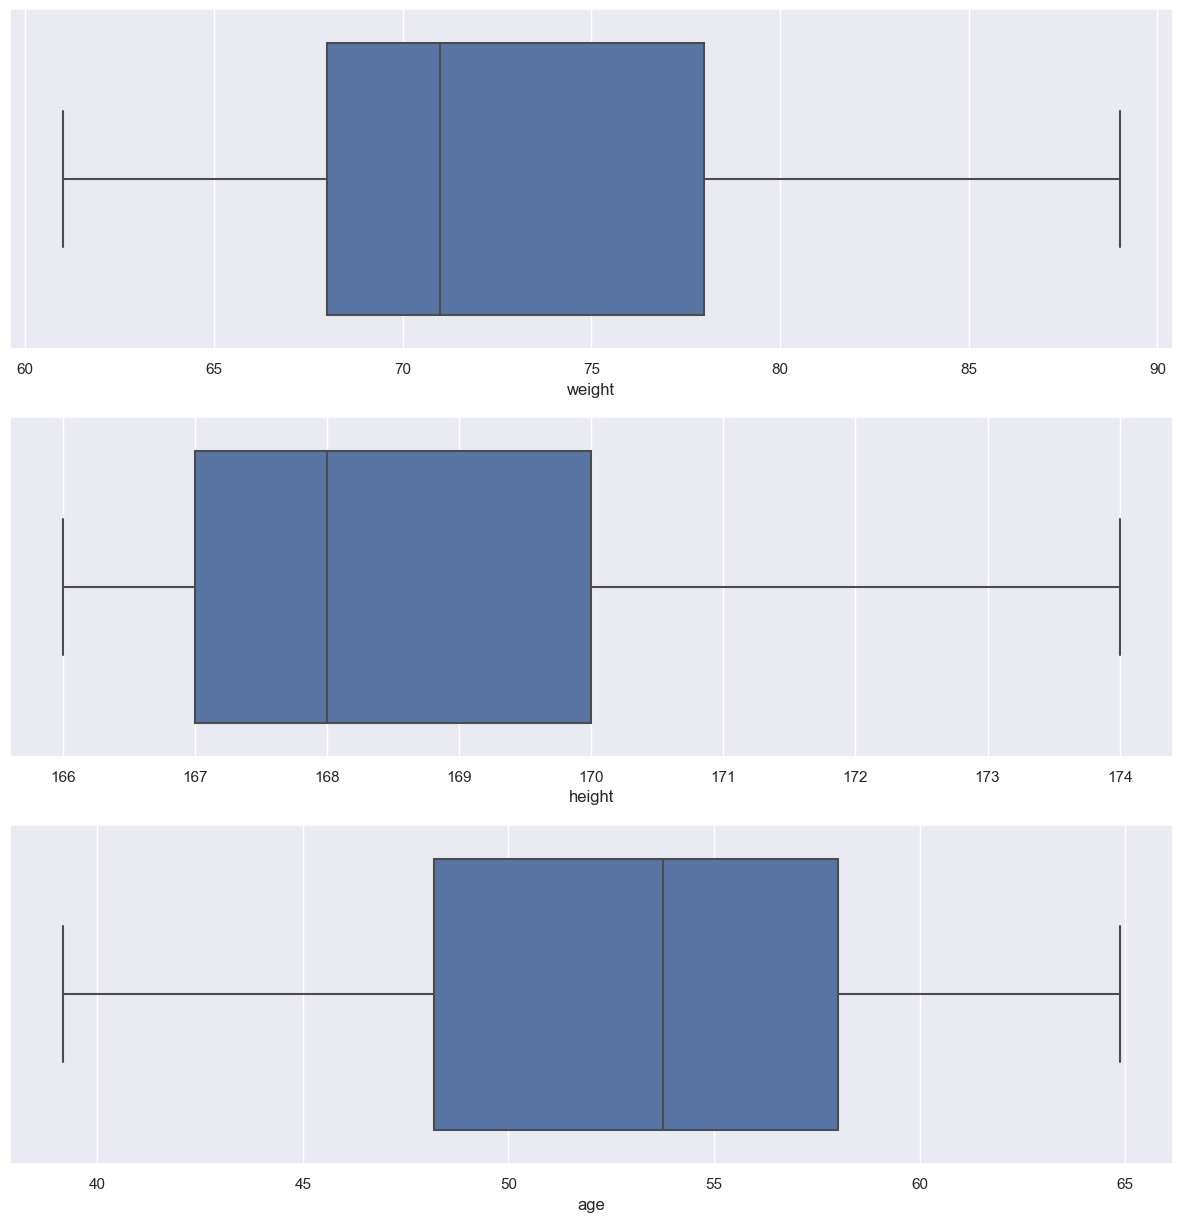

In [5]:
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(data = cleaned, x = 'weight', ax = axes[0])
sb.boxplot(data = cleaned, x = 'height', ax = axes[1])
sb.boxplot(data = cleaned, x = 'age', ax = axes[2])

# Exploratory Data Analysis

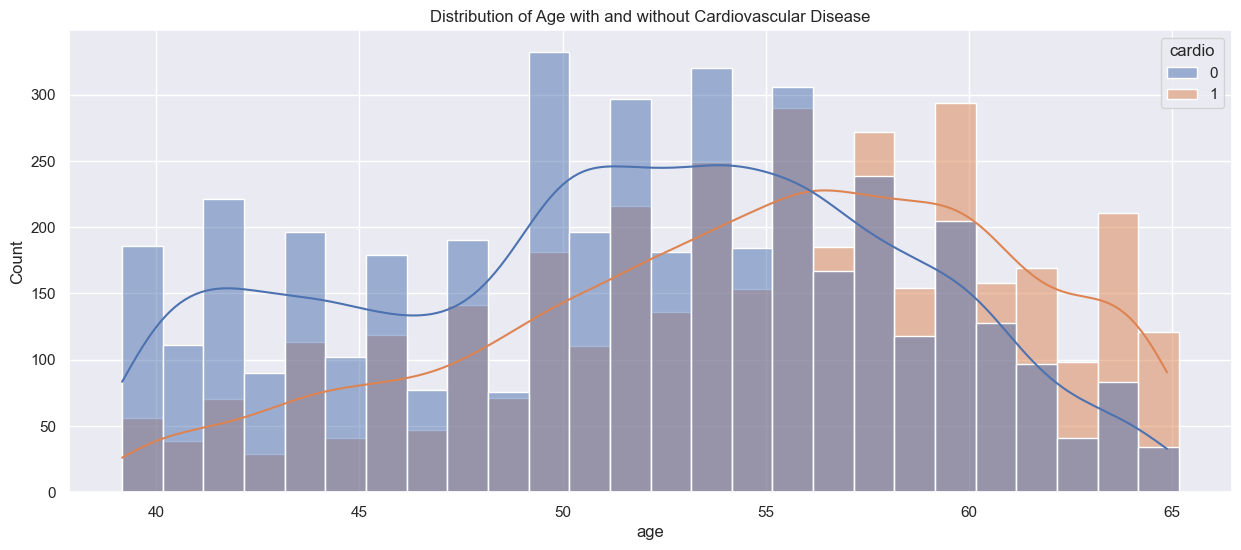

In [17]:
plt.figure(figsize=(15,6))
sb.histplot(data=cleaned, x='age',hue='cardio', binwidth = 1, kde=True)
plt.title("Distribution of Age with and without Cardiovascular Disease")
plt.show()

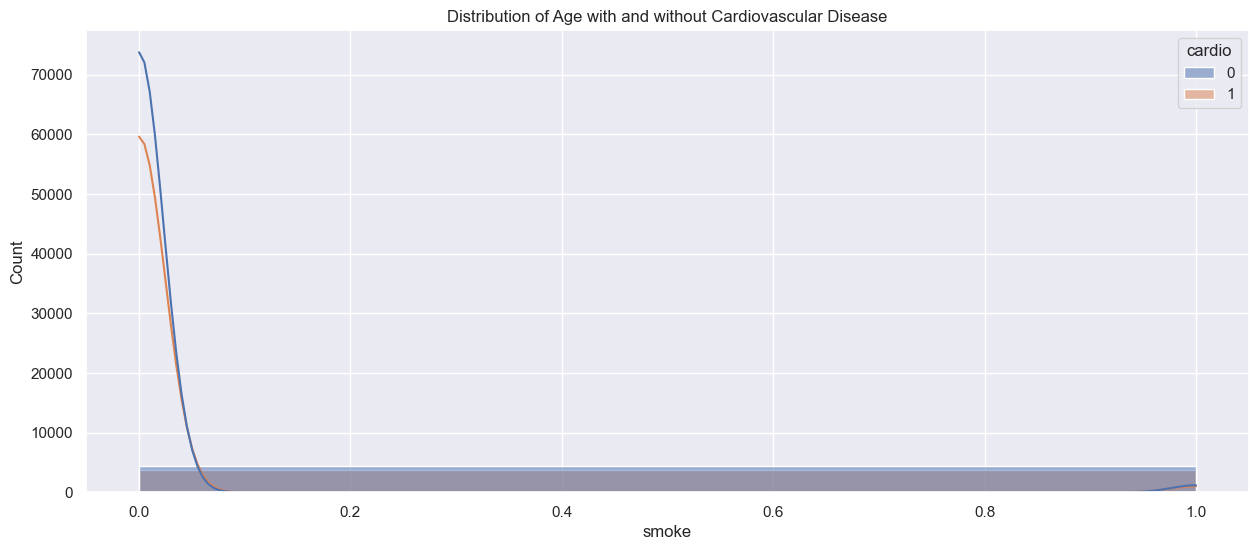

In [18]:
plt.figure(figsize=(15,6))
sb.histplot(data=cleaned, x='smoke',hue='cardio', binwidth = 1, kde=True)
plt.title("Distribution of Age with and without Cardiovascular Disease")
plt.show()
#Add Visualisation of each category with cardio and without

# Machine Learning

In [51]:
cleaner = cleaned.drop('cardio',axis=1)

xTrain, xVal, yTrain, yVal = train_test_split(pd.DataFrame(cleaned["smoke"]), pd.DataFrame(cleaned["cardio"]), test_size = 0.2)
MLList = {}

In [52]:
classifier = GradientBoostingClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['GradientBoostingClassifier'] = accuracy
print(accuracy)

0.5377475247524752


C:\Users\jesst\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
classifier = LogisticRegression(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['LogisticRegression'] = accuracy

C:\Users\jesst\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
classifier = SGDClassifier(random_state=42)
predictor = classifier.fit(xTrain, yTrain)
yPred = predictor.predict(xVal)
accuracy = accuracy_score(yVal, yPred)
MLList['SGDClassifier'] = accuracy

In [46]:
MLList

{'GradientBoostingClassifier': 0.713490099009901,
 'LogisticRegression': 0.7066831683168316,
 'SGDClassifier': 0.4566831683168317}

In [ ]:
#Add Classification Accuracy